In [89]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn import linear_model
import seaborn as sns


In [90]:
data_train=pd.read_csv("Train.csv")
data_test=pd.read_csv("Test.csv")
# briefly summarize training dataset 
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [91]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, '#')

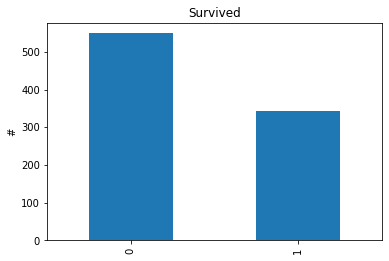

In [92]:
# analyze the dataset and visualize all the features to see which ones will be used for logistic regression 

# overall survived vs. died 
fig=plt.figure()
# plt.subplot2grid((2,3),(0,0))
data_train.Survived.value_counts().plot(kind="bar")
plt.title(u"Survived")
plt.ylabel(u"#")

Text(0, 0.5, '#')

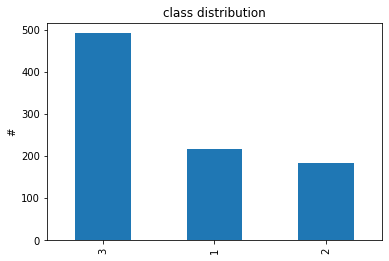

In [93]:
# data visualization of class distribution 
data_train.Pclass.value_counts().plot(kind="bar")
plt.title(u"class distribution")
plt.ylabel(u"#")

Text(0.5, 0, 'age')

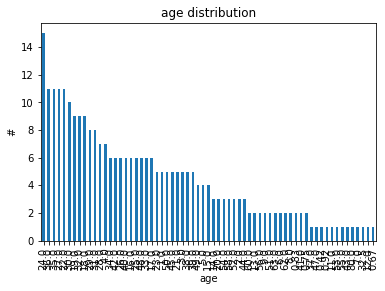

In [94]:
# data visualization of the age distribution 
survived = data_train[data_train['Survived'] == 1]
survived.Age.value_counts().plot(kind = 'bar')
plt.title(u"age distribution")
plt.ylabel(u"#")
plt.xlabel(u"age")


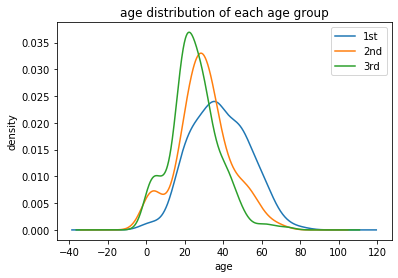

In [95]:
# age distribution among each age group
data_train.Age[data_train.Pclass==1].plot(kind="kde")
data_train.Age[data_train.Pclass==2].plot(kind="kde")
data_train.Age[data_train.Pclass==3].plot(kind="kde")
plt.xlabel(u"age")
plt.ylabel(u"density")
plt.title(u"age distribution of each age group")
plt.legend((u"1st",u"2nd",u"3rd"),loc="best")

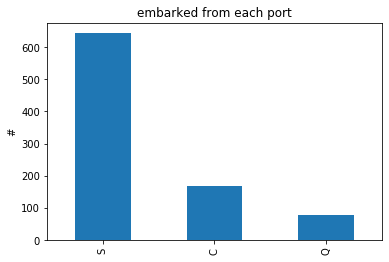

In [96]:
# visualization of the embarkment from different location 
data_train.Embarked.value_counts().plot(kind="bar")
plt.title(u"embarked from each port")
plt.ylabel(u"#")
plt.show()

<Figure size 432x288 with 0 Axes>

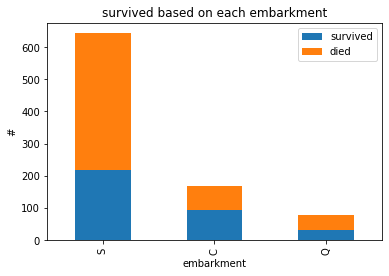

In [113]:
# the survival situation based on the embarkment 
fig=plt.figure()

survived = data_train.Embarked[data_train.Survived == 1].value_counts()
died = data_train.Embarked[data_train.Survived == 0].value_counts()
df=pd.DataFrame({u'survived':survived,u'died':died})
df.plot(kind="bar",stacked=True)
plt.title(u'survived based on each embarkment')
plt.xlabel(u'embarkment')
plt.ylabel(u'#')
plt.show()

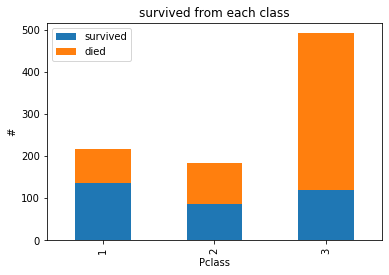

In [97]:
# the survival rate from each class
survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'survived':survived_1, u'died':survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"survived from each class")
plt.xlabel(u"Pclass") 
plt.ylabel(u"#") 
plt.show()


<Figure size 432x288 with 0 Axes>

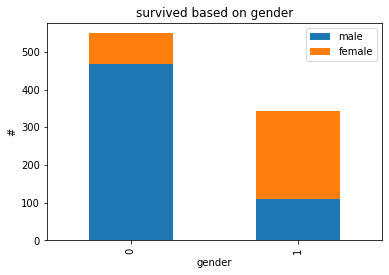

In [98]:
#gender and survival 
fig=plt.figure()

survived_male=data_train.Survived[data_train.Sex == 'male'].value_counts()
survived_female=data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'male':survived_male,u'female':survived_female})
df.plot(kind="bar",stacked=True)
plt.title(u'survived based on gender')
plt.xlabel(u'gender')
plt.ylabel(u'#')
plt.show()

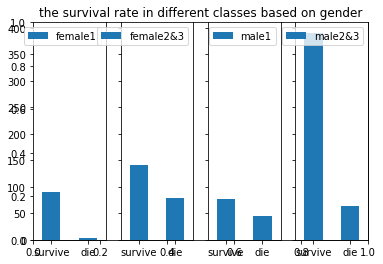

In [101]:
# the survival rate of male and female in differnet classes
fig=plt.figure()
plt.title(u'the survival rate in different classes based on gender')
fig1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 1].value_counts().plot(kind="bar",label="female1")
fig1.set_xticklabels([u'survive',u'die'],rotation=0)
fig1.legend([u'female1'],loc='best')
          
fig2=fig.add_subplot(142,sharey=fig1)
data_train.Survived[data_train.Sex=='female'][data_train.Pclass!=1].value_counts().plot(kind="bar",label="female2&3")
fig2.set_xticklabels([u'survive',u'die'],rotation=0)
fig2.legend([u'female2&3'],loc='best')

fig3=fig.add_subplot(143,sharey=fig1)
data_train.Survived[data_train.Sex=='male'][data_train.Pclass==1].value_counts().plot(kind="bar",label="male1")
fig3.set_xticklabels([u'survive',u'die'],rotation=0)
fig3.legend([u'male1'],loc='best')

fig4=fig.add_subplot(144,sharey=fig1)
data_train.Survived[data_train.Sex=='male'][data_train.Pclass!=1].value_counts().plot(kind="bar",label="male2&3")
fig4.set_xticklabels([u'survive',u'die'],rotation=0)
fig4.legend([u'male2&3'],loc='best')
                  

<Figure size 432x288 with 0 Axes>

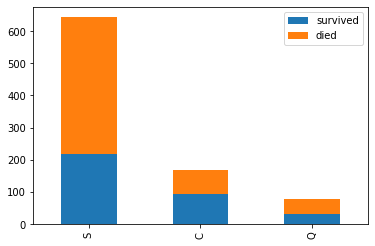

In [102]:
# the relationship between the port and the survival rate 
fig=plt.figure()
survived=data_train.Embarked[data_train.Survived==1].value_counts()
died=data_train.Embarked[data_train.Survived==0].value_counts()
df=pd.DataFrame({u'survived':survived,u'died':died})
df.plot(kind="bar",stacked="true")

In [103]:
# the relationship between the number of siblings and survival. 
group=data_train.groupby(['SibSp','Survived'])
df=pd.DataFrame(group.count()['PassengerId'])
print (df)

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7


In [111]:
# the relationship between the number of parents, and survival. 
group=data_train.groupby(['Parch','Survived'])
df=pd.DataFrame(group.count()['PassengerId'])
print (df)

                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1


In [25]:
#the relationship between the cabin and the survival rate
data_train.Cabin.value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
C22 C26            3
F33                3
F2                 3
D                  3
E101               3
C126               2
B58 B60            2
D17                2
C125               2
D36                2
C83                2
C65                2
C123               2
D33                2
B77                2
E121               2
D26                2
B20                2
B28                2
D35                2
C52                2
E8                 2
D20                2
F4                 2
E33                2
B57 B59 B63 B66    2
C124               2
                  ..
D9                 1
E17                1
B79                1
C87                1
C45                1
C99                1
D47                1
E12                1
E40                1
C54                1
A34                1
E34                1
D46                1
C49                1
C111               1
A14                1
B86          

<Figure size 432x288 with 0 Axes>

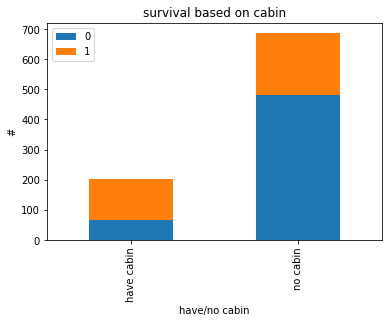

In [26]:
# data visualizatin of the survival based on the cabin 
fig=plt.figure()
survived_cabin=data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
survived_nocabin=data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({u'have cabin':survived_cabin,u'no cabin':survived_nocabin}).transpose()
df.plot(kind="bar",stacked=True)
plt.title(u'survival based on cabin')
plt.xlabel(u'have/no cabin')
plt.ylabel(u'#')
plt.show()

# Reasoning for picked features 

I picked Pclass as a feature because from the graph, we can tell that people from the first class are more likely to survive whereas the death rate on the 3rd class is really high. I also picked sex as a feature because the graph clearly says that male has a higher death rate and female has a higher survival rate. I also picked age as a feature because it’s obvious that younger people were more likely to survive. I picked SibSp because people who didn’t spouses or sibling were more likely die. And I picked parents as a feature as well because from the analysis, people who didn’t have parents with them were more like to die. I picked Embarked from the graph we can tell that people who embarked from S were way more likely to survive. I chose embarked as a feature because S had the most people embarked from and had the highest survival rate among all, which might also be insightful. I didn’t drop Cabin because from the graph we can that people who didn’t have a cabin on record were more likely to die. Even though we didn’t have that many cabin data available, I believe it can still provide useful information. 

However, I didn’t pick name as a feature, because everyone has different names and it’s hard to see a trend from such a broad of names. Also I didn’t pick ticket because the data input in that column is very diverse and I couldn’t tell a pattern. 

In [108]:
data_train = pd.read_csv("Train.csv")
data_test = pd.read_csv("Test.csv")

def format_data(df, train_=True):
    #Feature Engineering
    df["Age"] = df["Age"].fillna(df["Age"].mean())
    df["Fare"] = df["Fare"].fillna(df["Fare"].mean())
    df["Cabin_"] = df["Cabin"].notnull()
    df = df.drop(columns=["Cabin", "Ticket", "Name"])

    #Normalizing numerical features
    scaler=preprocessing.StandardScaler()
    df['age_norm'] = scaler.fit_transform(df[['Age']], scaler.fit(df[['Age']]))
    df['fare_norm'] = scaler.fit_transform(df[['Fare']], scaler.fit(df[['Fare']]))

    #Getting the dummy dfs
    sex = pd.get_dummies(df["Sex"])
    embarked = pd.get_dummies(df["Embarked"])
    cabin = pd.get_dummies(df["Cabin_"])
    pclass = pd.get_dummies(df["Pclass"])
   
    #Concatting the dummy dfs together
    if train_ == True:
        df =df[["Survived", "age_norm", "SibSp", "Parch", "fare_norm"]]
        df = pd.concat([df, sex, embarked, cabin, pclass],axis=1)
    else:
        df = df[["age_norm", "SibSp", "Parch", "fare_norm"]]
        df = pd.concat([df, sex, embarked, cabin, pclass],axis=1)
        df
    return df

#Train logistic model
train = format_data(data_train, train_=True)
train
x = train.drop(columns=["Survived"])
y = train[["Survived"]]
clf = linear_model.LogisticRegression().fit(x, y)

#Formatting test data 
test = format_data(data_test, train_=False)
predictions = clf.predict(test)
test = pd.read_csv("Test.csv")
test["Survived"] = predictions
test[["PassengerId", "Survived"]].to_csv("result.csv", index=False)

/Users/ashleyshen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ashleyshen/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
correction rate is 0.75837